In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict



In [2]:
data = pd.read_csv('../Data/CrabAgePrediction.csv')

In [3]:
sns.set_style("whitegrid")

In [4]:
data

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [6]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [7]:
data.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [8]:
data.corr()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Length,1.000000,0.986653,0.823081,0.925374,0.898181,0.903253,0.897736,0.554973
Diameter,0.986653,1.000000,0.829532,0.925770,0.893626,0.899810,0.905561,0.573844
Height,0.823081,0.829532,1.000000,0.814405,0.770961,0.793272,0.812290,0.551956
Weight,0.925374,0.925770,0.814405,1.000000,0.969077,0.965583,0.955269,0.538819
Shucked Weight,0.898181,0.893626,0.770961,0.969077,1.000000,0.931280,0.882406,0.418760
Viscera Weight,0.903253,0.899810,0.793272,0.965583,0.931280,1.000000,0.906105,0.501328
Shell Weight,0.897736,0.905561,0.812290,0.955269,0.882406,0.906105,1.000000,0.625195
Age,0.554973,0.573844,0.551956,0.538819,0.418760,0.501328,0.625195,1.000000


<AxesSubplot:>

<Figure size 1500x1500 with 0 Axes>

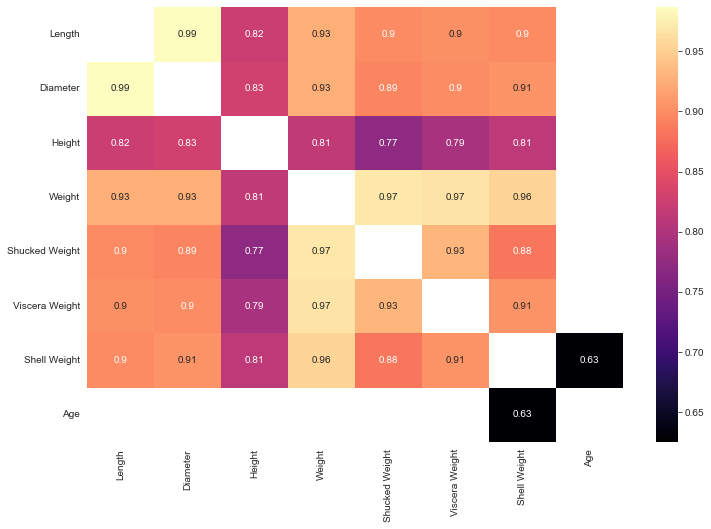

In [9]:
plt.figure(figsize=(10,10), dpi=150)
data_corr = data.corr()

kot = data_corr[((data_corr>=.6 )| (data_corr <= -.6)) & (data_corr !=1.000)]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap='magma', annot=True)

## Highly correlated features:

In [10]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

In [11]:
feature_corr = pd.DataFrame(corrFilter(data, .6), columns=['correlation'])
feature_corr.sort_values(by='correlation', ascending=False).head()

,,correlation
Diameter,Length,0.986653
Weight,Shucked Weight,0.969077
Viscera Weight,Weight,0.965583
Weight,Shell Weight,0.955269
Viscera Weight,Shucked Weight,0.931280


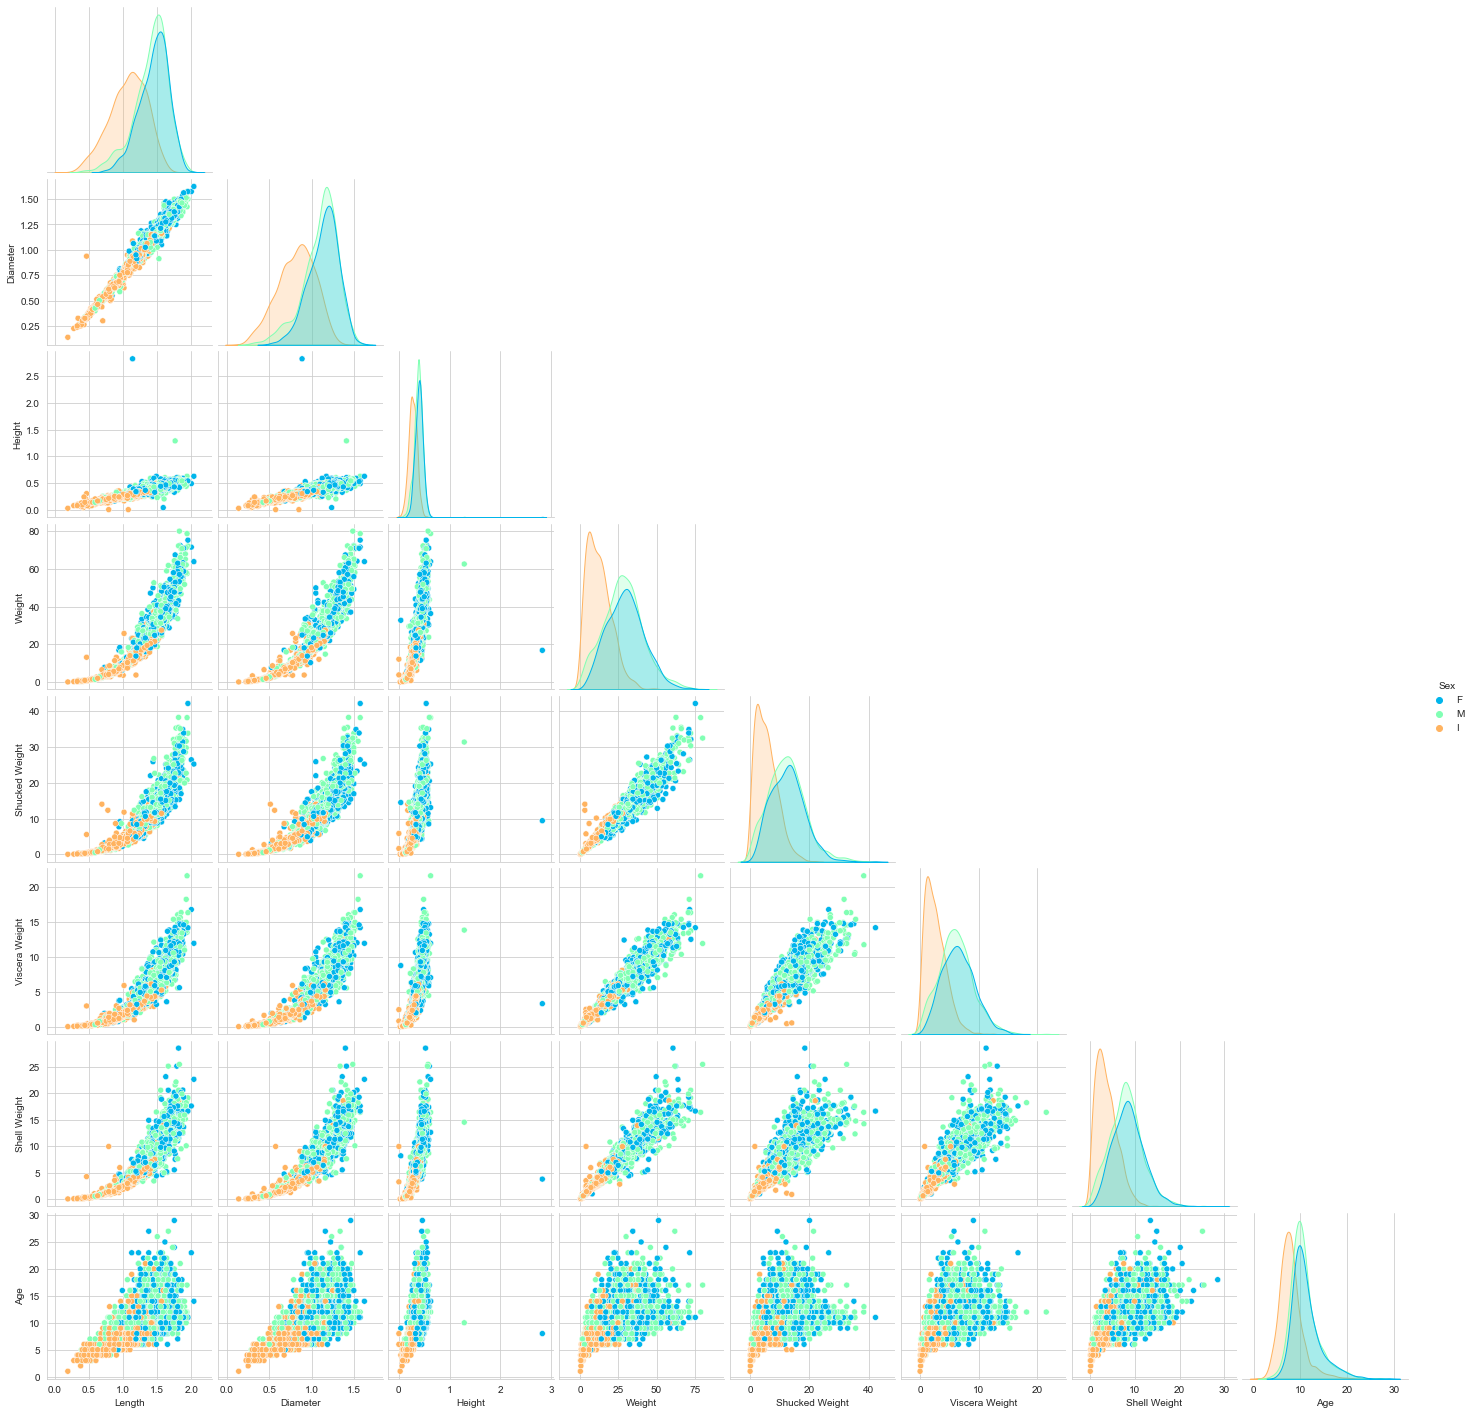

In [12]:
sns.pairplot(data, hue='Sex', corner=True, palette='rainbow')

<Figure size 500x400 with 0 Axes>

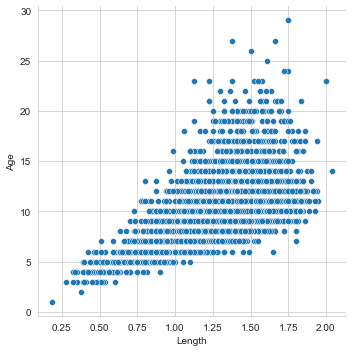

In [13]:
plt.figure(figsize=(5,4), dpi=100)
sns.relplot(x = "Length", y = "Age", data = data);

<Figure size 500x400 with 0 Axes>

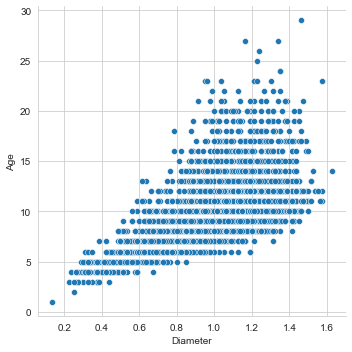

In [14]:
plt.figure(figsize=(5,4), dpi=100)
sns.relplot(x = "Diameter", y = "Age", data = data);

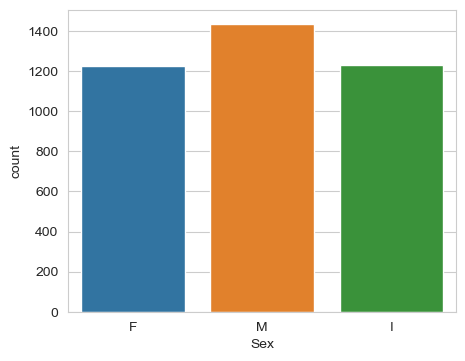

In [15]:
plt.figure(figsize=(5,4), dpi=100)

sns.countplot(x = "Sex", data = data);

In [16]:
data['Sex'].value_counts(normalize=True)

M    0.368610
I    0.316722
F    0.314667
Name: Sex, dtype: float64

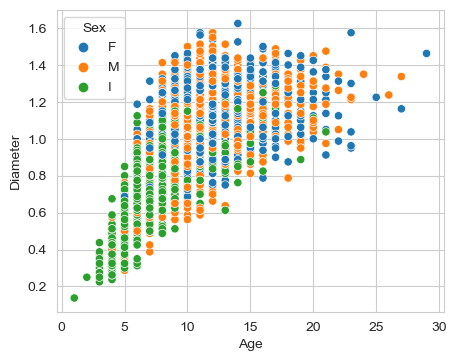

In [17]:
plt.figure(figsize=(5,4), dpi=100)
sns.scatterplot(data=data, x="Age", y="Diameter", hue="Sex");

<AxesSubplot:xlabel='Age', ylabel='Diameter'>

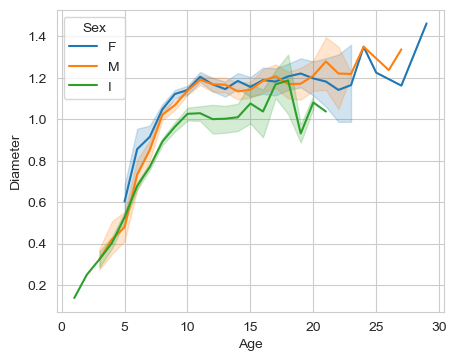

In [18]:
plt.figure(figsize=(5,4), dpi=100)
sns.lineplot(data=data, x="Age", y="Diameter", hue="Sex")

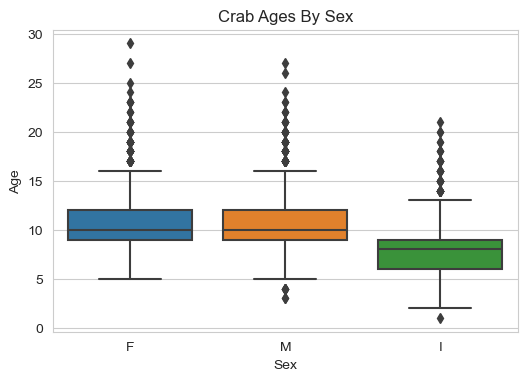

In [19]:
plt.figure(dpi=100)
sns.boxplot(data=data, x="Sex", y="Age")
plt.title("Crab Ages By Sex");

In [20]:
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [21]:
data['Age'].mean()

9.954790649884409

In [22]:
data['Age'].median()

10.0

Text(0.5, 1.0, 'baseline')

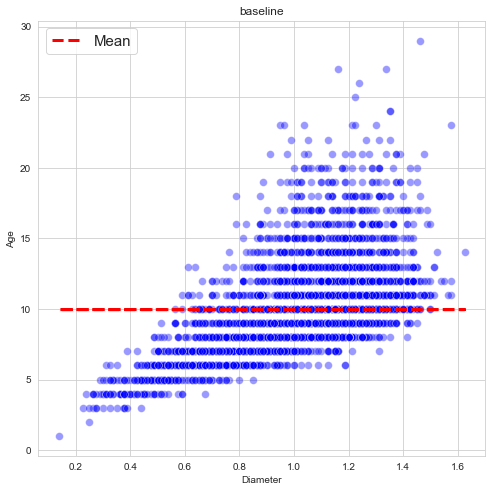

In [23]:
# Plotting the baseline:
plt.figure(figsize=(8,8))
mean = [np.mean(data['Age'])]* len(data['Diameter'])
sns.scatterplot(x =data['Diameter'],y = data['Age'],color='blue',alpha=.4,s=60)
plt.plot(data['Diameter'],mean,label='Mean', linestyle='--', color='red', linewidth=3)
plt.legend(fontsize=15);
plt.title('baseline')

In [24]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

In [28]:
data

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,1
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1,0
...,...,...,...,...,...,...,...,...,...,...
3888,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8,0,0
3889,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10,0,0
3890,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5,1,0
3891,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6,1,0


In [30]:
X = data[['Diameter', 'Length', 'Weight', 'Viscera Weight']]
y = data['Age']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state=42)

## Scaling

In [32]:
scaler = StandardScaler()
X_train_sc= scaler.fit_transform(X_train)
X_test_sc= scaler.transform(X_test)

In [33]:
rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train_sc, y_train)
rfc.score(X_train_sc, y_train), rfc.score(X_test_sc, y_test)

(0.9049101586420726, 0.2945095100643099)

In [34]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
lr.score(X_train_sc, y_train), lr.score(X_test_sc, y_test)

(0.3401408277769784, 0.34250888432515225)